# Problema 3 del segundo examen parcial

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u_x(0,t)=u_x(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f(x),\;\;\;0<x<1$$
$$f(x)=\left\{ \begin{array}{lcc}
             -2 &   si  & 0< x \leq 1/2 \\
             \\ 0 &  si  & 1/2<x<1 
             \end{array}
   \right.$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\frac{4}{\pi}\sum_{n=1}^{\infty} \frac{sen(0.5n\pi)}{n}e^{-(n\pi)^2 t}cos(n\pi x)$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from math import *

Para empezar, graficamos la condición inicial u(x,0)=f(x)

In [2]:
def f(x):
  if (x<0.5 and x>0):
    return -2
  else:
    return 0

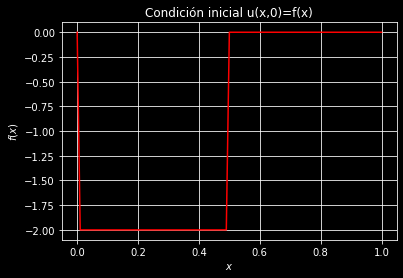

In [26]:
x = []
y = []
for k in range(101):
  x.append(0.01*k)
  y.append(f(0.01*k))

plt.plot(x,y,"r",label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
style.use('dark_background')
plt.title("Condición inicial u(x,0)=f(x)")
plt.grid()
plt.show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=\left\{ \begin{array}{lcc}
             -2 &   si  & 0< x \leq 1/2 \\
             \\ 0 &  si  & 1/2<x<1 
             \end{array}
   \right.$.

In [4]:
def fourier(x,N): # N es el número de armónicos
    s = 0
    for n in range(1,N+1):
        s += (sin(0.5*n*pi)/n)*cos(n*pi*x)
    return (-4/pi)*s-1

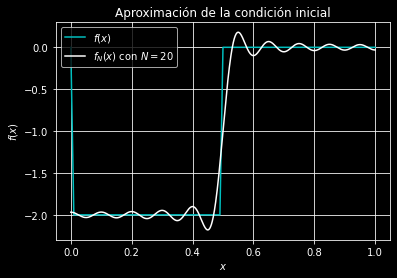

In [16]:
x1=[]
y1=[]
for i in range(1001):
  x1.append(0.001*i)
  y1.append(fourier(0.001*i,20))

plt.plot(x,y,"c",label='$f(x)$')
plt.plot(x1,y1,"white",label='$f_N(x)$ con $N=20$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
style.use('dark_background')
plt.title("Aproximación de la condición inicial")
plt.legend(loc='upper left')
plt.grid()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

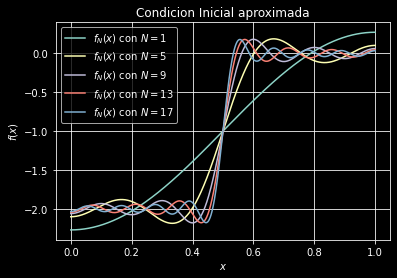

In [23]:
def Fourier(lista,N):
  l=[]
  for t in range(len(lista)):
    l.append(fourier(lista[t],N))
  return l

for i in range(1,20,4):
    plt.plot(x1,Fourier(x1,i),label='$f_N(x)$ con $N=%d$' %i)

plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condicion Inicial aproximada")
style.use('dark_background')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [7]:
# funcion u(x,0)
def u(x,t):
  s = 0
  for n in range(1,81):
    s += (sin(0.5*n*pi)/n)*cos(n*pi*x)*e**((-t)*(n*pi)**2)
  return (-4/pi)*s-1

y2=[]
for n2 in range(len(x1)):
  y2.append(u(x1[n2],0))


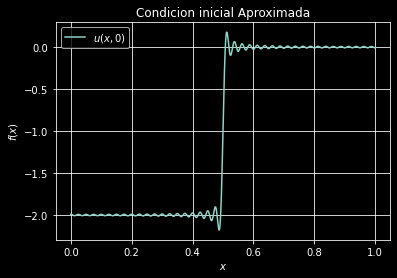

In [24]:
plt.plot(x1,y2,label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
style.use('dark_background')
plt.title("Condicion inicial Aproximada")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

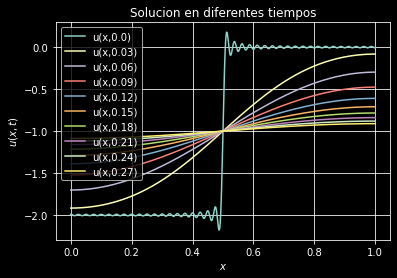

In [25]:
def u_n(lista,t):
  l=[]
  for n2 in range(len(lista)):
    l.append(u(x1[n2],t))
  return l


for t2 in range(0,30,3):
  v=0.01*t2
  plt.plot(x1,u_n(x1,0.01*t2), label='u(x,%r)'%v)

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
style.use('dark_background') 
plt.title("Solucion en diferentes tiempos")
plt.grid()
plt.legend(loc='upper left')
plt.show()

Por ultimo Podemos observar este grafico en 3D


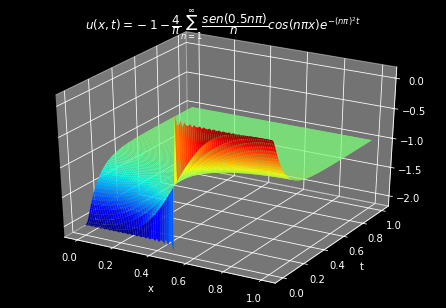

In [21]:

#region cuadrada donde se va a graficar u(x,t)
X=[]
T=[]
for t in range(101):
  X.append(0.01*t)
  T.append(0.01*t)

X,T=np.meshgrid(X,T)

#funcion u(x,t)
def Z(x,t):
  m = np.zeros(np.shape(x))
  for i in range(np.shape(x)[0]):
    for j in range(np.shape(x)[1]):
      m[i][j]=u(x[i][j],t[i][j])
  return m

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,T,Z(X,T), rstride=1, cstride=1, cmap=cm.jet)

plt.xlabel('x')
plt.ylabel('t')
style.use('dark_background')
plt.title('$u(x,t)=-1-\dfrac{4}{\pi}\sum_{n=1}^{\infty}\dfrac{sen(0.5n\pi)}{n}cos(n\pi x)e^{-(n\pi)^2t}$')
plt.show()
